#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")
from sklearn.decomposition import TruncatedSVD

#### Loading the dataset

In [2]:
amazon_ratings = pd.read_csv(r"C:\Users\KALYAN\Desktop\ratings_Beauty.csv")
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [3]:
amazon_ratings.shape

(2023070, 4)

In [4]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<Axes: xlabel='ProductId'>

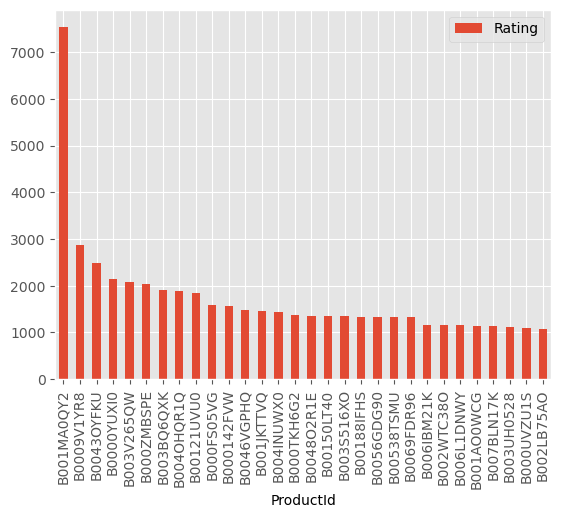

In [5]:
most_popular.head(30).plot(kind = "bar")

In [6]:
# Subset of Amazon Ratings

amazon_ratings1 = amazon_ratings.head(10000)

In [7]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
ratings_utility_matrix.shape

(9697, 886)

In [9]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X.shape

(886, 9697)

Unique products in subset of data

In [11]:
X1 = X

### Decomposing the Matrix

In [12]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [13]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

correlation_matrix

In [14]:
X.index[99]

'6117036094'

In [15]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [16]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [17]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['0205616461',
 '0733001998',
 '0737104473',
 '130414089X',
 '1412759676',
 '1457982633',
 '1879187396',
 '1987958179',
 '3222000565']

In [18]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [19]:
product_descriptions = pd.read_csv(r"C:\Users\KALYAN\Desktop\product_descriptions.csv")
product_descriptions.shape

(124428, 2)

In [20]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [21]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [22]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

#### Visualizing product clusters in subset of data

C:\Users\KALYAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


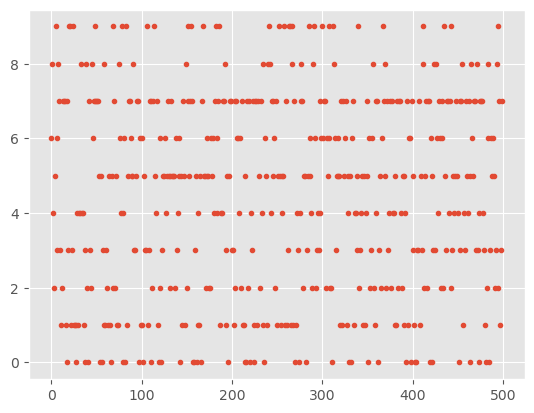

In [23]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()


F

In [24]:
def print_cluster(i, terms):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()

## Output
* Recommendation of product based on the current product selected by user.
* To recommend related product based on, Frequently bought together. 

#### Top words in each cluster based on product description

In [25]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
    print_cluster(i, terms)


Top terms per cluster:
Cluster 0:
 cutting
 concrete
 saw
 20
 blade
 steel
 brick
 stake
 blades
 ft

Cluster 1:
 wood
 wall
 natural
 ft
 painted
 proposition
 nbsp
 residents
 california
 65

Cluster 2:
 paint
 finish
 ft
 azek
 soft
 trim
 project
 mirror
 soap
 easily

Cluster 3:
 brush
 laminate
 use
 wash
 epoxy
 concrete
 easy
 designed
 water
 roller

Cluster 4:
 patio
 frame
 steel
 fabric
 collection
 outdoor
 resistant
 weather
 dining
 spring

Cluster 5:
 snow
 ice
 easy
 free
 tool
 water
 handle
 protection
 speed
 year

Cluster 6:
 air
 water
 power
 ft
 heater
 insulation
 cooling
 installation
 easy
 cooking

Cluster 7:
 water
 toilet
 installation
 easy
 use
 design
 offers
 tile
 piece
 flush

Cluster 8:
 light
 metal
 watt
 led
 bulb
 bulbs
 fan
 fixture
 lighting
 white

Cluster 9:
 sheet
 cabinet
 design
 cut
 32
 aluminum
 door
 window
 style
 36



#### Predicting clusters based on key search words

In [26]:
def show_recommendations(product, terms):
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    print_cluster(prediction[0], terms)

In [27]:
show_recommendations("cutting tool",terms)

Cluster 0:
 cutting
 concrete
 saw
 20
 blade
 steel
 brick
 stake
 blades
 ft



In [28]:
show_recommendations("spray paint",terms)

Cluster 2:
 paint
 finish
 ft
 azek
 soft
 trim
 project
 mirror
 soap
 easily



In [30]:
show_recommendations("steel drill",terms)

Cluster 4:
 patio
 frame
 steel
 fabric
 collection
 outdoor
 resistant
 weather
 dining
 spring



In [31]:
show_recommendations("water",terms)

Cluster 6:
 air
 water
 power
 ft
 heater
 insulation
 cooling
 installation
 easy
 cooking

